# Data Analysis Project: Air Quality
Name: Reggina Indriani Putri Suwarsono

Email: regginaindriani54@gmail.com

Asal Kota: Jakarta Timur

# Business Questions:
1. Berdasarkan kumpulan data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Guanyuan, Nongzhanguan, dan Dingling), bagaimana tren polusi udara selama lima tahun terakhir?

2. Apakah terdapat korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama lima tahun terakhir?

3. Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015?

4. Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Nongzhanguan?

5. Apakah terdapat korelasi antara N02 terhadap SO2?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Wrangling

### Gathering Data

Dalam sel berikut ini, saya menyimpan tiga file CSV ke dalam tiga variabel yang berbeda dan kemudian menggabungkan ketiga file ini menjadi satu dalam satu variabel. Penting untuk memastikan bahwa struktur CSV konsisten di semua kumpulan data sebelum menggabungkannya.

In [3]:
path1 = '/content/drive/MyDrive/DataSource/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv'
path2 = '/content/drive/MyDrive/DataSource/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv'
path3 = '/content/drive/MyDrive/DataSource/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
105188,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
105189,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
105190,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


# Assesing Data

Pada sel berikut, saya akan memeriksa kelengkapan data, termasuk jumlah baris untuk setiap kolom, mengidentifikasi jumlah nilai nol dalam data, dan memeriksa tipe data setiap kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105192 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    103169 non-null  float64
 6   PM10     103667 non-null  float64
 7   SO2      103542 non-null  float64
 8   NO2      102607 non-null  float64
 9   CO       100221 non-null  float64
 10  O3       102299 non-null  float64
 11  TEMP     105099 non-null  float64
 12  PRES     105102 non-null  float64
 13  DEWP     105099 non-null  float64
 14  RAIN     105101 non-null  float64
 15  wd       104893 non-null  object 
 16  WSPM     105121 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 14.4+ MB


In [5]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


tidak ada duplikasi di setiap kolom

In [6]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5      2023
PM10       1525
SO2        1650
NO2        2585
CO         4971
O3         2893
TEMP         93
PRES         90
DEWP         93
RAIN         91
wd          299
WSPM         71
station       0
dtype: int64

Melalui output sel sebelumnya, ditemukan bahwa ada nilai yang hilang di PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRESS, DEWP, HUJAN, wd, WSPM

In [8]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,105192.000000,105192.000000,105192.00000,105192.000000,105192.000000,103169.000000,103667.000000,103542.000000,102607.000000,100221.000000,102299.000000,105099.000000,105102.000000,105099.000000,105101.000000,105121.000000
mean,17532.500000,2014.662560,6.52293,15.729637,11.500000,77.938496,100.620701,16.021202,47.971760,1168.383483,60.940515,13.647391,1010.719050,2.358965,0.063937,1.807693
std,10122.153028,1.177202,3.44872,8.800134,6.922219,80.472637,89.883289,21.732128,35.910704,1130.704484,56.845668,11.407667,10.512871,13.789844,0.819223,1.267456
min,1.000000,2013.000000,1.00000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.800000,982.400000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.00000,8.000000,5.750000,19.000000,34.000000,3.000000,20.000000,400.000000,14.000000,3.200000,1002.200000,-9.100000,0.000000,1.000000
50%,17532.500000,2015.000000,7.00000,16.000000,11.500000,52.000000,78.000000,8.000000,39.000000,800.000000,50.000000,14.600000,1010.400000,2.900000,0.000000,1.500000
75%,26298.250000,2016.000000,10.00000,23.000000,17.250000,108.000000,139.000000,20.000000,69.000000,1400.000000,86.000000,23.325000,1019.000000,15.000000,0.000000,2.300000
max,35064.000000,2017.000000,12.00000,31.000000,23.000000,881.000000,999.000000,293.000000,273.000000,10000.000000,500.000000,41.400000,1042.000000,28.800000,72.500000,11.200000


# Cleaning Data

Mengganti Missing Value dari masing-masing fitur dengan nilai mean

Membuat Sebuah Fungsi yang akan mengganti nilai setiap Fitur yang NaN dengan nilai rata-rata masing - masing dataset untuk data numerik

In [15]:
def remove_nan_to_mean(data_df):
    for column_name in data_df.select_dtypes(include=['number']).columns:
        data_df[column_name].fillna(data_df[column_name].mean(),inplace = True)

In [16]:
remove_nan_to_mean(df)

Membuat Sebuah Fungsi yang akan mengganti nilai setiap Fitur yang NaN dengan nilai yang sering muncul masing - masing dataset untuk data Non Numerik

In [17]:
def non_numerik_Freq(data_df):
    for column_name in data_df.select_dtypes(include=['object']).columns:
        mode_value = data_df[column_name].mode().iloc[0]
        data_df[column_name].fillna(mode_value, inplace=True)

In [18]:
non_numerik_Freq(df)

Cek kembali apakah terdapat data dengan Nilai Null, dapat dilihat sudah tidak terdapat data dengan nilai Null atau NaN

In [19]:
print("Jumlah Data Null pada dataframe:\n",df.isna().sum())

Jumlah Data Null pada dataframe:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


# Exploratory Data Analysis (EDA)

Selanjutnya, saya akan melakukan statistik deskriptif dengan tujuan untuk mendapatkan pemahaman awal tentang distribusi, tendensi sentral, dan karakteristik data dalam kolom yang akan saya gunakan. Ini adalah langkah awal yang penting dalam analisis data untuk mengidentifikasi pola dan tren yang mungkin ada dalam data.

In [20]:
df[['PM2.5','PM10', 'CO', 'TEMP', 'PRES', 'DEWP']].describe()

,PM2.5,PM10,CO,TEMP,PRES,DEWP
count,105192.000000,105192.000000,105192.000000,105192.000000,105192.000000,105192.000000
mean,77.938496,100.620701,1168.383483,13.647391,1010.719050,2.358965
std,79.695069,89.229372,1103.664368,11.402623,10.508373,13.783747
min,2.000000,2.000000,100.000000,-16.800000,982.400000,-35.300000
25%,19.000000,34.000000,500.000000,3.200000,1002.200000,-9.000000
50%,54.000000,79.000000,900.000000,14.600000,1010.400000,2.900000
75%,107.000000,138.000000,1400.000000,23.300000,1019.000000,14.900000
max,881.000000,999.000000,10000.000000,41.400000,1042.000000,28.800000


Selanjutnya, saya akan memeriksa rentang waktu (dalam tahun) dalam data secara mendetail dengan mengidentifikasi tahun berapa saja yang ada di dalam kumpulan data.

In [21]:
df['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

Selanjutnya, saya akan membuat histogram dari distribusi data pada kolom 'PRES' pada DataFrame df dengan menggunakan Seaborn. Histogram ini akan menampilkan distribusi nilai 'PRES' dalam 9 interval (bin) dengan batas-batas yang ditandai dengan garis hitam. Hal ini akan menunjukkan apakah distribusi data pada kolom 'PRES' mendekati normal.

<ipython-input-23-2899fd649965>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PRES'], hist=True, kde=False,


Text(0, 0.5, 'Count')

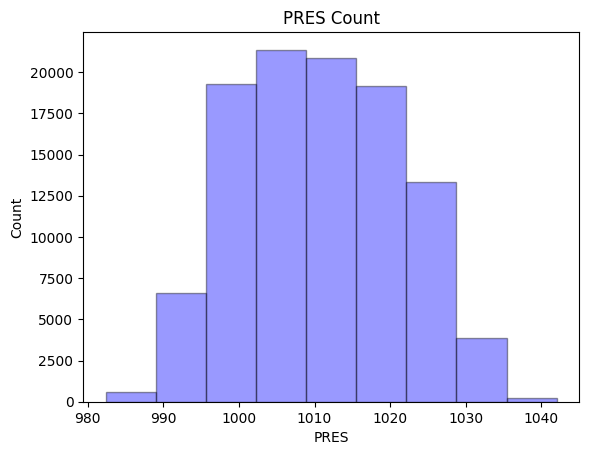

In [23]:
sns.distplot(df['PRES'], hist=True, kde=False,
             bins=9, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('PRES Count')
plt.xlabel("PRES")
plt.ylabel('Count')

# Visualization & Explanatory Analysis

Pertanyaan 1 : Berdasarkan kumpulan data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Guanyuan, Nongzhanguan, dan Dingling), bagaimana tren polusi udara selama lima tahun terakhir?

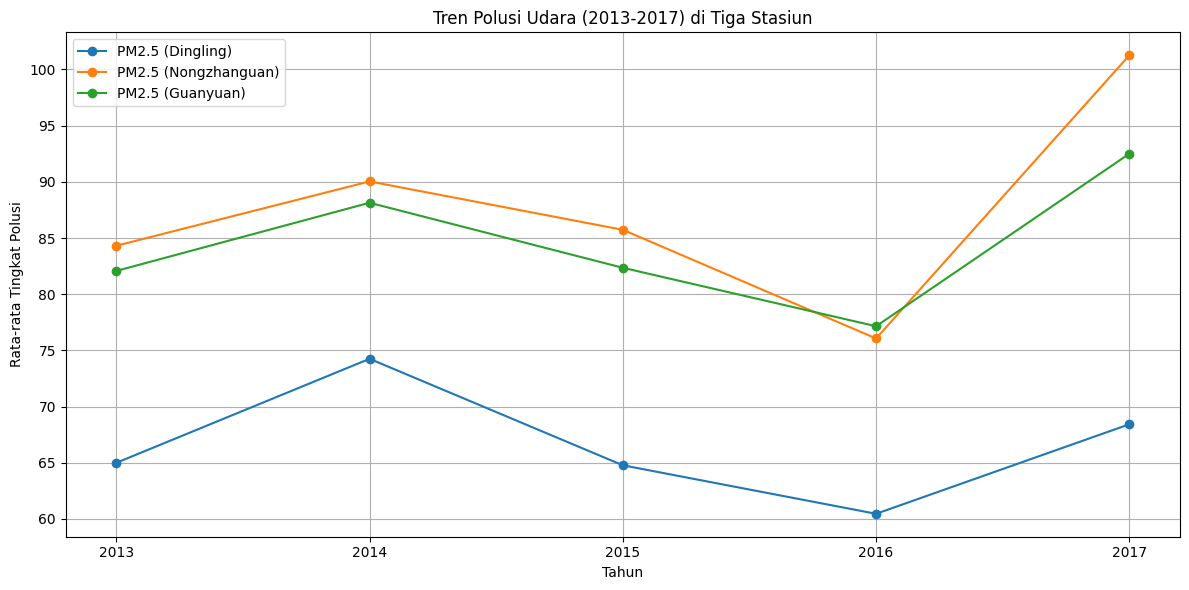

In [24]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Nongzhanguan', 'Guanyuan']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM2.5'], label=f'PM2.5 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data PM2.5 di atas, kita dapat menyimpulkan hal-hal berikut:

Dingling, Nongzhanguan, Changping: Terdapat tren penurunan dari tahun 2014 hingga 2016, diikuti dengan sedikit peningkatan pada tahun 2017.

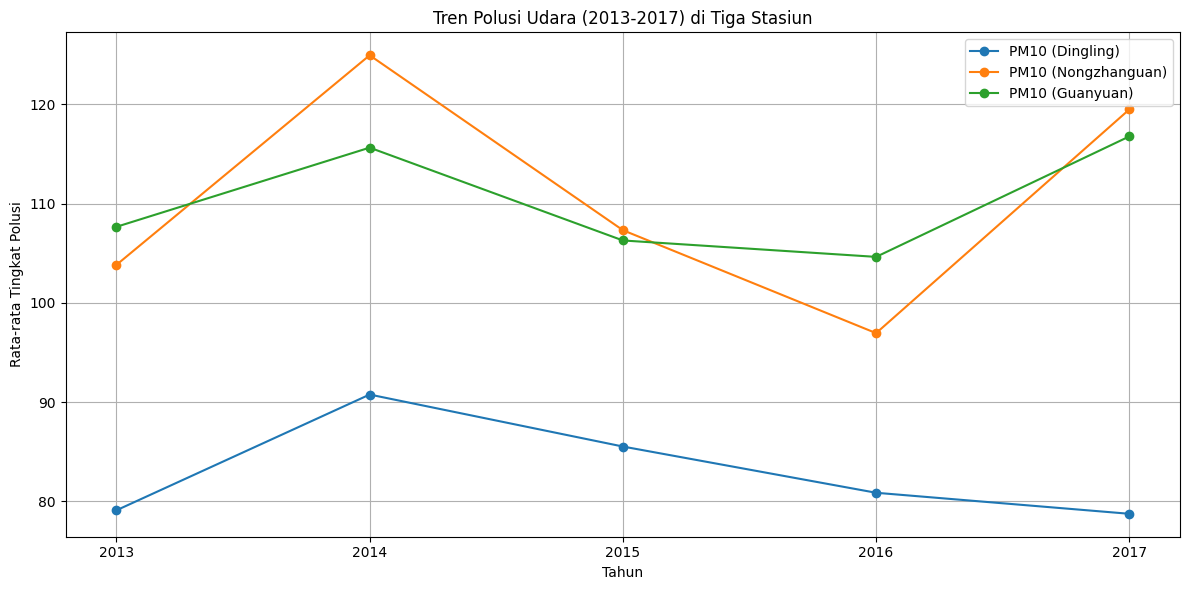

In [26]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Nongzhanguan', 'Guanyuan']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['PM10'], label=f'PM10 ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data PM10 di atas, dapat ditarik kesimpulan sebagai berikut:

1. Dingling: Terdapat tren penurunan dari tahun 2014 hingga 2016, diikuti dengan kembalinya ke level awal pada tahun 2017.
2. Nongzhanguan: Terdapat tren penurunan dari tahun 2014 hingga 2016, diikuti dengan peningkatan pada tahun 2017.
3. Guanyuan: Mirip dengan Nonzhanguan,Terdapat tren penurunan dari tahun 2014 hingga 2016, diikuti dengan peningkatan pada tahun 2017.

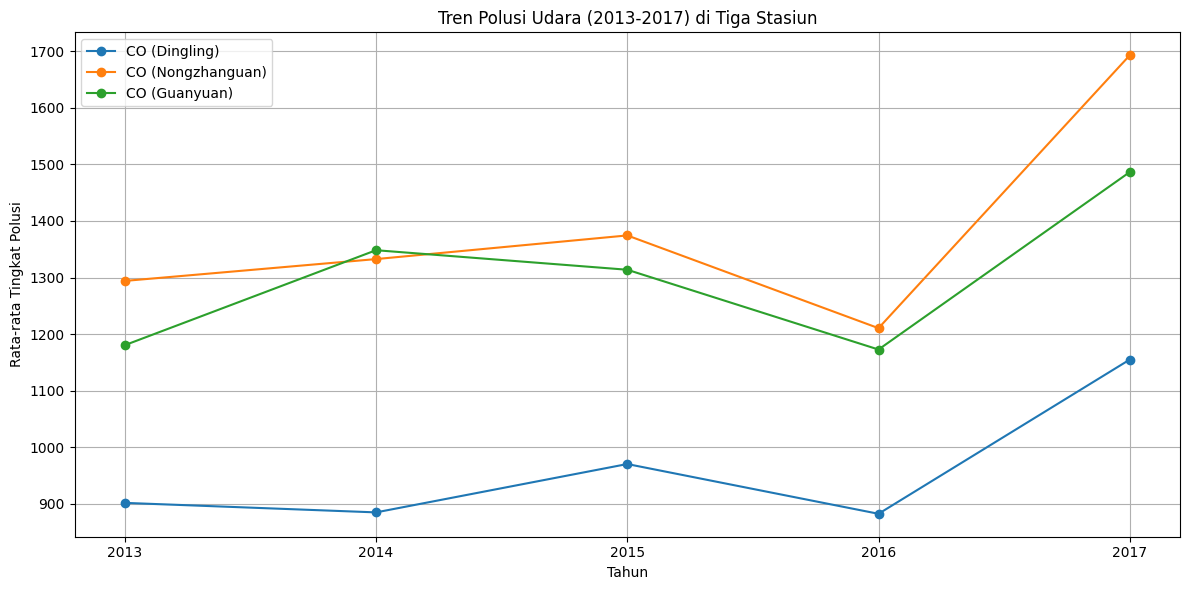

In [27]:
grouped = df.groupby(['year', 'station'])[['PM2.5', 'PM10', 'CO']].mean().reset_index()

plt.figure(figsize=(12, 6))
for station in ['Dingling', 'Nongzhanguan', 'Guanyuan']:
    station_data = grouped[grouped['station'] == station]
    plt.plot(station_data['year'], station_data['CO'], label=f'CO ({station})', marker='o')

plt.title('Tren Polusi Udara (2013-2017) di Tiga Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Tingkat Polusi')
plt.xticks(range(2013, 2018))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan plot tren data CO di atas, dapat ditarik kesimpulan sebagai berikut:

1. Dingling: Terdapat tren yang fluktuatif dari tahun ke tahun, namun dengan peningkatan yang signifikan pada tahun 2017.
2. Nongzhanguan: Terdapat tren yang fluktuatif dari tahun ke tahun dengan peningkatan yang signifikan pada tahun 2017.
3. Guanyuan: Terdapat tren penurunan dari tahun 2014 hingga 2016, diikuti dengan peningkatan pada tahun 2017.

Pertanyaan 2 : Apakah terdapat korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama lima tahun terakhir?

Pada sel berikut, saya akan melakukan analisis korelasi di antara variabel numerik dalam set data. Saya hanya akan memilih kolom dengan tipe data numerik dan kemudian membuat peta panas menggunakan Seaborn untuk memvisualisasikan korelasi antara variabel-variabel ini. Peta panas ini memungkinkan saya untuk dengan cepat mengamati hubungan korelasi antara variabel numerik dalam bentuk warna, di mana warna yang lebih cerah menunjukkan korelasi positif, dan warna yang lebih gelap menunjukkan korelasi negatif. Anotasi dengan nilai numerik dalam sel peta panas memberikan nilai korelasi yang spesifik. Hal ini membantu saya memahami hubungan antara variabel dalam dataset, yang dapat menjadi langkah penting dalam analisis data dan pemilihan fitur untuk pemodelan data.

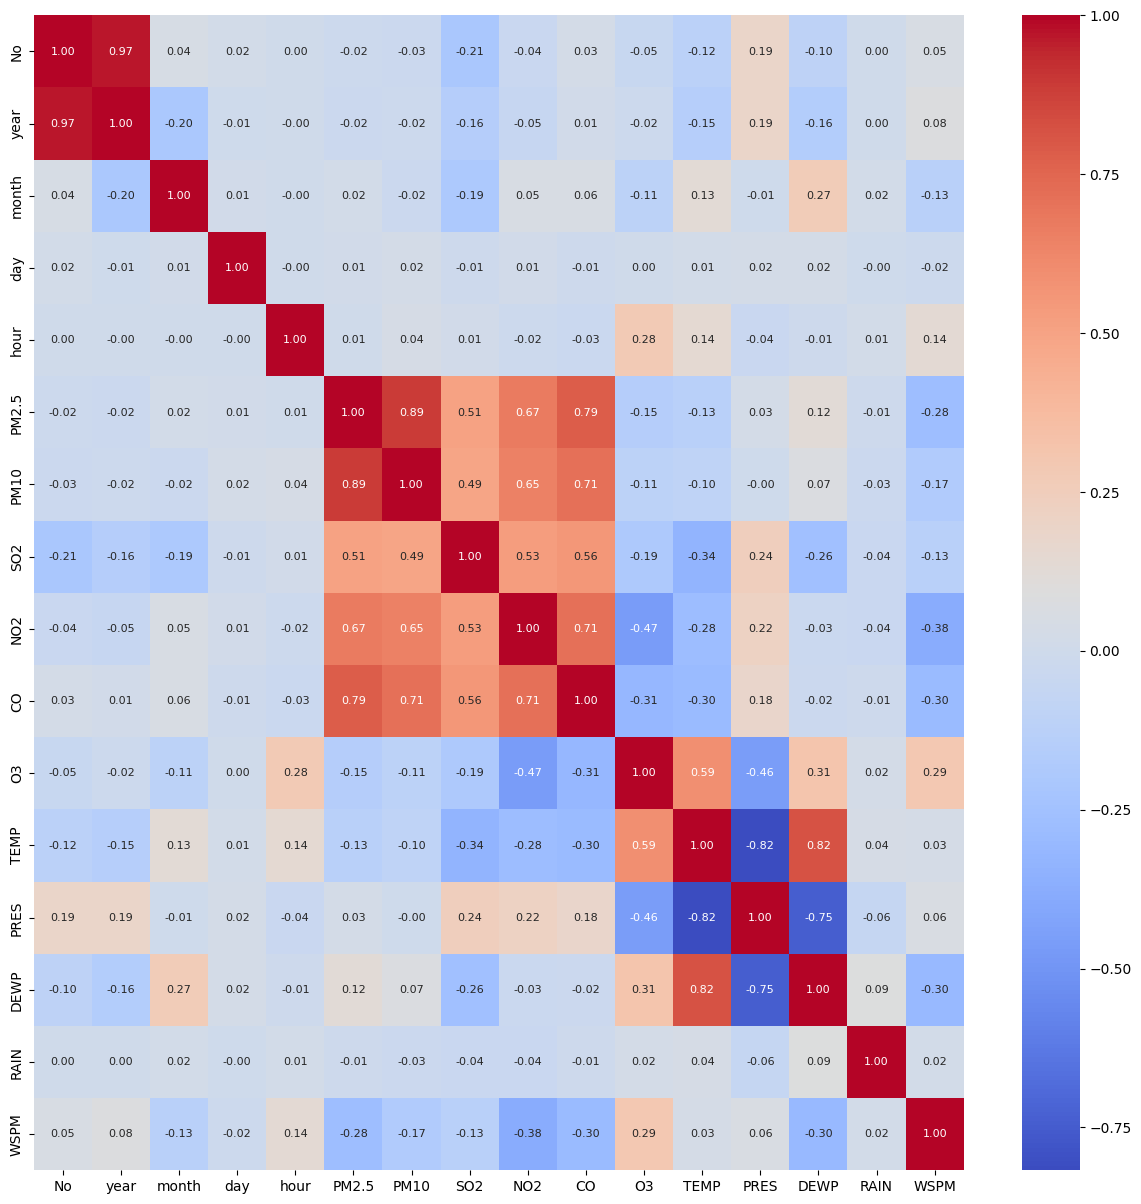

In [28]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.show()


Selanjutnya, saya akan membuat sebuah pairplot, yang merupakan sebuah visualisasi yang memungkinkan kita untuk melihat hubungan antara kolom-kolom yang dipilih dalam DataFrame secara bersamaan. Kolom yang saya pilih dalam kode ini adalah 'PM2.5', 'TEMP' (suhu), 'PRES' (tekanan udara), dan 'DEWP' (titik embun). Dengan menggunakan Seaborn, saya dapat melihat serangkaian scatter plot di antara semua kombinasi pasangan kolom ini. Setiap scatter plot menggambarkan hubungan antara dua kolom, sedangkan diagonal dari pairplot menampilkan distribusi univariat dari setiap kolom. Tujuan dari visualisasi ini adalah untuk memberikan wawasan awal tentang bagaimana variabel-variabel ini berinteraksi satu sama lain dan apakah ada pola atau tren yang terlihat dalam data.

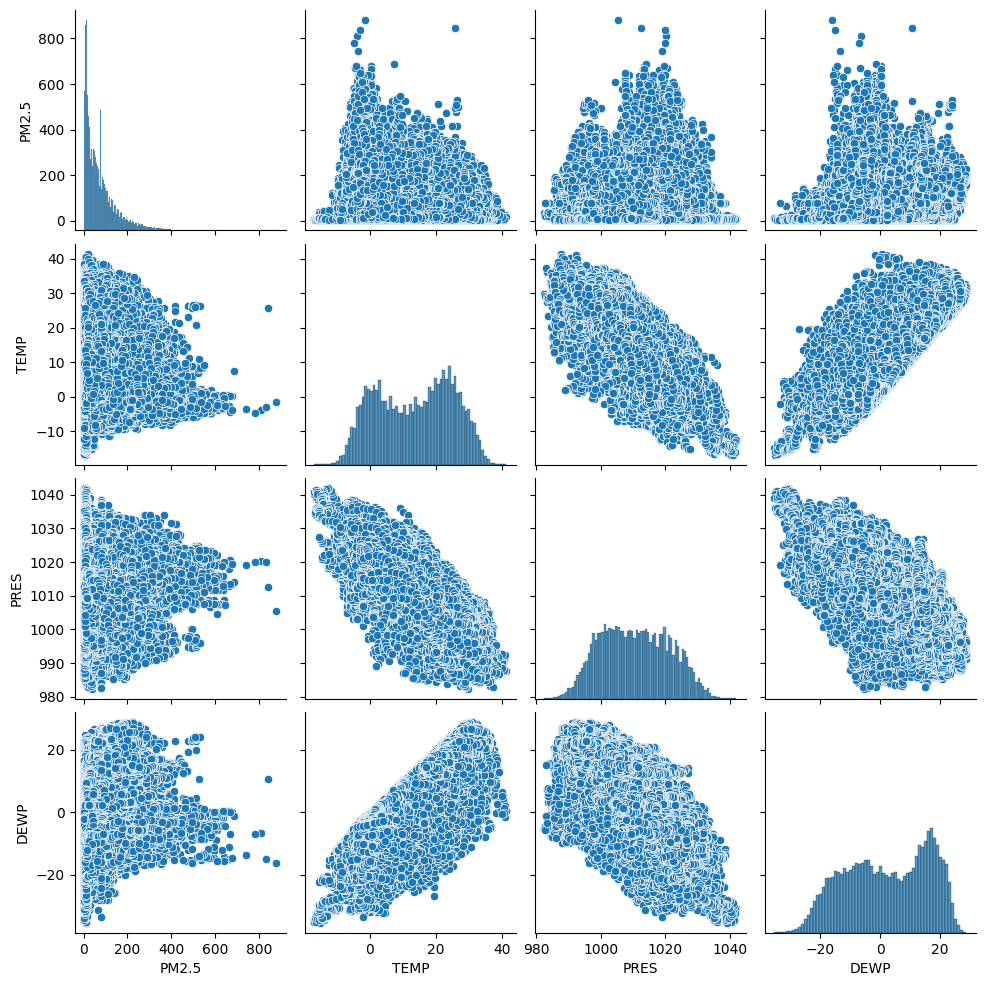

In [29]:
selected_columns = df[['PM2.5','TEMP', 'PRES', 'DEWP']]
sns.pairplot(selected_columns)

Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('TEMP' atau suhu) dan sumbu y ('PM2.5' atau partikulat PM2.5) dari DataFrame. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'TEMP' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan suhu berhubungan dengan perubahan tingkat partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

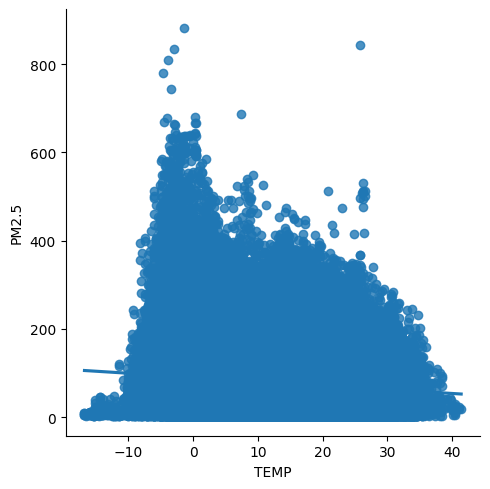

In [30]:
sns.lmplot(x='TEMP',y='PM2.5', data = df)

Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('PRES' atau tekanan udara) dan sumbu y ('PM2.5' atau materi partikulat PM2.5) dari DataFrame df. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'PRES' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan tekanan udara berhubungan dengan perubahan tingkat partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

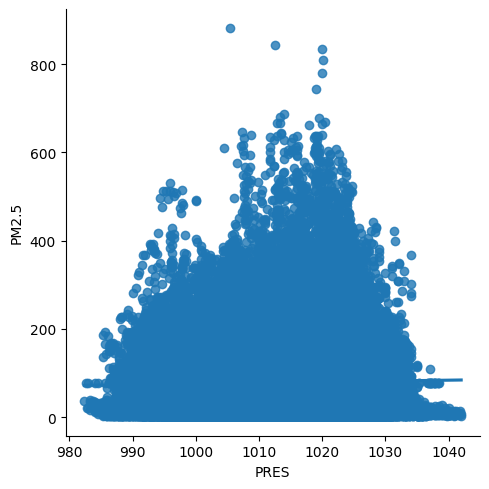

In [31]:
sns.lmplot(x='PRES',y='PM2.5', data = df)

Selanjutnya, saya akan membuat plot regresi linier menggunakan Seaborn dengan sumbu x ('DEWP' atau titik embun) dan sumbu y ('PM2.5' atau materi partikulat PM2.5) dari DataFrame df. Tujuannya adalah untuk memvisualisasikan hubungan antara variabel 'DEWP' dan 'PM2.5' dan melihat apakah ada tren linier di antara keduanya. Plot ini dapat membantu saya mengeksplorasi bagaimana perubahan titik embun berhubungan dengan perubahan tingkat partikulat PM2.5 dalam dataset dan apakah hubungan ini dapat dijelaskan dengan regresi linier.

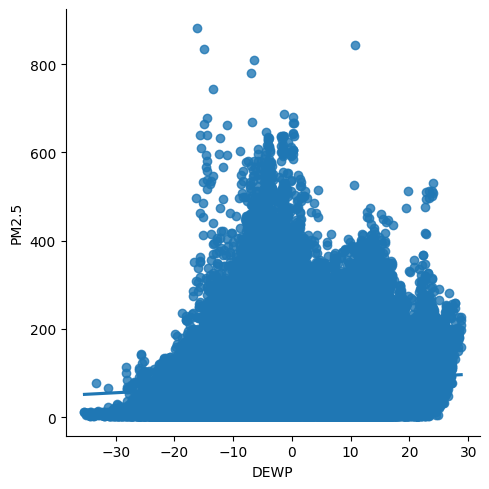

In [32]:
sns.lmplot(x='DEWP',y='PM2.5', data = df)

Pertanyaan 3 : Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015?

In [60]:
max_pm_2015 = df[df["year"] == 2015].groupby(by=["station"]).agg({
    "PM2.5" : "max"
})

max_pm_2015

,PM2.5
station,
Dingling,647.0
Guanyuan,680.0
Nongzhanguan,667.0


Dapat dilihat pada output diatas, Tingkat PM2.5 yang paling tertinggi pada tahun 2015 adalah Guanyuan dimana Tingkat PM2.5 yang paling rendah merupakan Dingling.

Pertanyaan 5 :  Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Nongzhanguan?

In [61]:
tingkat_perkembangan = df[df["station"]=="Nongzhanguan"].groupby(by=["year"]).agg({
    "PM2.5":"mean",
    "PM10":"mean"
})
tingkat_perkembangan

,PM2.5,PM10
year,,
2013,84.313535,103.828337
2014,90.036652,124.941263
2015,85.732269,107.322548
2016,76.060742,96.953466
2017,101.265157,119.488189


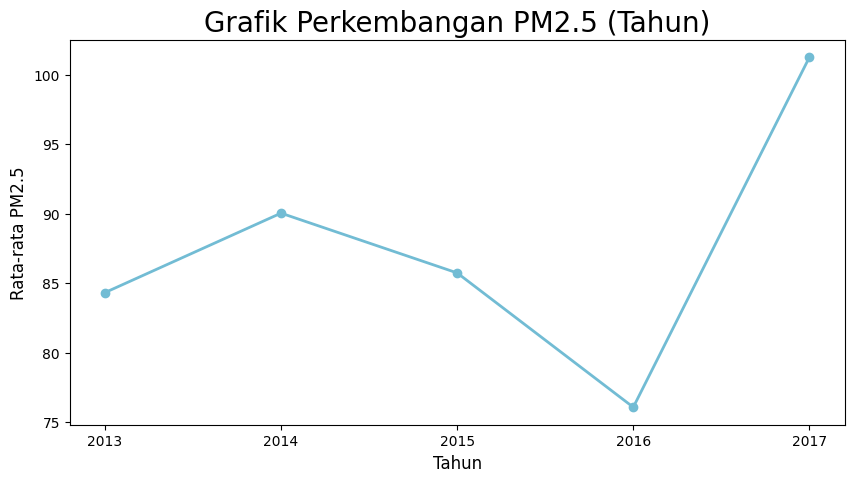

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(
    tingkat_perkembangan.index,
    tingkat_perkembangan["PM2.5"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Grafik Perkembangan PM2.5 (Tahun)", loc="center", fontsize=20)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(ticks=tingkat_perkembangan.index, labels=[str(int(year)) for year in tingkat_perkembangan.index], fontsize=10)
plt.show()

Grafik ini menunjukkan bahwa konsentrasi PM2.5 di China yang mengalami peningkatan dari tahun ke tahun. Rata-rata konsentrasi PM2.5 pada tahun 2013 adalah 84 mikrogram per meter kubik. Angka ini meningkat menjadi 90 mikrogram per meter kubik pada tahun 2014, 86 mikrogram per meter kubik pada tahun 2015, dan 76 mikrogram per meter kubik pada tahun 2016. Pada tahun 2017, konsentrasi PM2.5 mencapai titik tertingginya, yaitu 103 mikrogram per meter kubik.

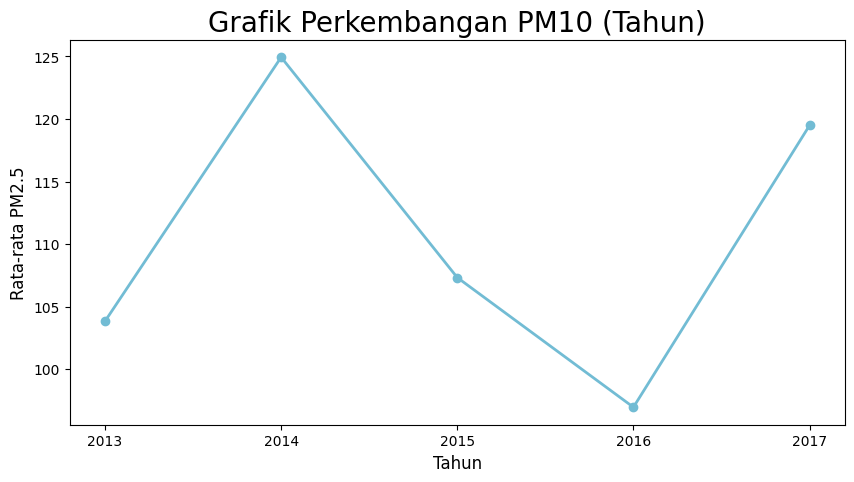

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(
    tingkat_perkembangan.index,
    tingkat_perkembangan["PM10"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Grafik Perkembangan PM10 (Tahun)", loc="center", fontsize=20)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Rata-rata PM2.5", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(ticks=tingkat_perkembangan.index, labels=[str(int(year)) for year in tingkat_perkembangan.index], fontsize=10)
plt.show()

Grafik ini menunjukkan bahwa konsentrasi PM10 di China yang mengalami peningkatan dari tahun ke tahun. Rata-rata konsentrasi PM10 pada tahun 2013 adalah 103 mikrogram per meter kubik. Angka ini meningkat menjadi 125 mikrogram per meter kubik pada tahun 2014 dan menjadi titik tertingginya, 108 mikrogram per meter kubik pada tahun 2015, dan 96 mikrogram per meter kubik pada tahun 2016. Pada tahun 2017, konsentrasi PM2.5 mencapai 119 mikrogram per meter kubik

Pertanyaan 5 : Apakah terdapat korelasi antara N02 terhadap SO2?

In [65]:
korelasi = df['NO2'].corr(df['SO2'])

print("Korelasi antara NO2 dan SO2:", korelasi)

Korelasi antara NO2 dan SO2: 0.5312019261373675


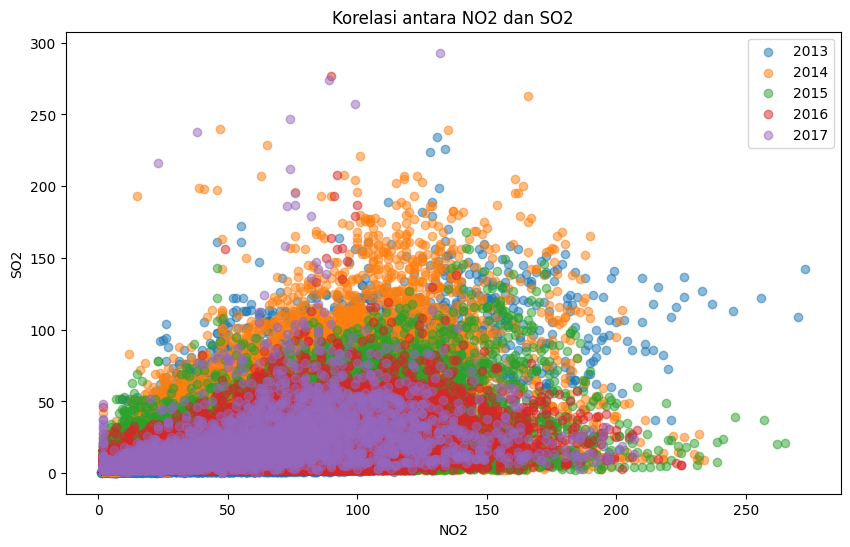

In [66]:
plt.figure(figsize=(10, 6))
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.scatter(year_data['NO2'], year_data['SO2'], label=year, alpha=0.5)

plt.xlabel('NO2')
plt.ylabel('SO2')
plt.title('Korelasi antara NO2 dan SO2')
plt.legend()
plt.show()

Berdasarkan grafik tersebut, terdapat korelasi antara NO2 dengan SO2. Hal ini dapat dilihat dari penyebaran titik-titik data yang menunjukkan pola linear.

Clustering PM2.5 terhadap PM10

K-Mean Clustering

Normalisasi

In [67]:
def minmax(df_input):
  list_fitur = df_input.columns
  for fitur in list_fitur:
    max = df_input[fitur].max()
    min = df_input[fitur].min()
    df_input[fitur] = (df_input[fitur] - min) / (max - min)
  return df_input

Euclidian Distance

In [68]:
def euclidian(data1, data2):
  jarak = np.square(data1 - data2)
  jarak = np.sum(jarak)
  return np.sqrt(jarak)

K Means Function

In [69]:
from random import randint
import copy

def kmeans(data_input, k, iter_max=200):
  n_data = data_input.shape[0]
  n_fitur = data_input.shape[1]
  iter = 1
  # Assign cluster secara acak
  cluster = np.array([randint(0, k-1) for i in range(n_data)])
  # Set nilai centroid = 0
  centroid = np.zeros((k, n_fitur))
  cluster_tidak_berubah = False
  while cluster_tidak_berubah == False and iter < iter_max:
    jarak = np.zeros((n_data, k))
    # Perbarui nilai centroid
    for i in range(k):
      centroid[i,:] = data_input.iloc[np.where(cluster==i)[0]].mean().tolist()
    for i in range(n_data):
      # Hitung jarak eucledian
      for j in range(k):
        jarak[i][j] = euclidian(data_input.iloc[i], centroid[j])
    # Perbarui anggota cluster
    cluster_baru = [np.argmin(jarak[i]) for i in range(n_data)]
    # Cek apakah terjadi perubahan cluster atau tidak
    cluster_tidak_berubah = np.array_equal(cluster_baru, cluster)
    cluster = np.array(copy.deepcopy(cluster_baru))
    iter += 1
  return cluster

Test 100 data pertama

In [70]:
data_test = df[["PM2.5", "PM10"]].head(100)
cluster = kmeans(data_test, 3)

[]

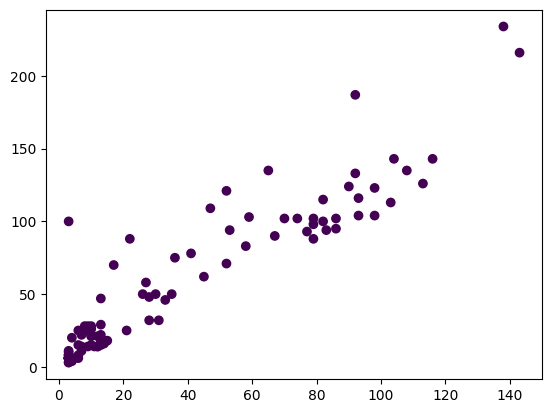

In [71]:
plt.scatter(data_test['PM2.5'], data_test['PM10'], c = cluster)
plt.plot()

# Solusi
Solusi Pertanyaan 1:

Berdasarkan set data PM2.5, PM10, dan CO di tiga stasiun yang berbeda (Dingling, Guanyuan, dan Nongzhanguan), bagaimana tren polusi udara selama lima tahun terakhir?

Berdasarkan analisis yang dilakukan pada sel sebelumnya, polusi udara di tiga stasiun ini memiliki tren yang berbeda selama lima tahun terakhir:

1. PM2.5: Ketiga stasiun menunjukkan fluktuasi dari tahun ke tahun, namun ketiganya mengalami peningkatan yang signifikan pada tahun 2017. Untuk Stasiun Dingling ia memiliki polusi udara yang lebih rendah dibandingkan dengan 2 stasiun tersebut.
2. PM10: Nongzhanguan dan Guanyuan juga menunjukkan fluktuasi dari tahun ke tahun, sedangkan Dingling pada tahun 2017 mengalami sedikit penurunan dengan kembalinya ke level awal
3. CO: Ketiga stasiun menunjukkan fluktuasi dari tahun ke tahun, namun ketiganya mengalami peningkatan yang signifikan pada tahun 2017.

Dari analisis di atas, Dingling cenderung memiliki kualitas udara yang lebih baik dibandingkan Guanyuan dan Nongzhanguan berdasarkan rata-rata kadar PM2.5, PM10, dan CO selama lima tahun terakhir.

Solusi Pertanyaan 2 :

Apakah terdapat korelasi antara parameter cuaca seperti suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) dengan tingkat polusi PM2.5 selama lima tahun terakhir?

Dari nilai korelasi yang diperoleh:

PM2.5 dengan TEMP = -0.13
PM2.5 dengan PRES = 0.03
PM2.5 dengan DEWP = 0.12

Dapat disimpulkan bahwa nilai korelasi yang rendah (mendekati nol) mengindikasikan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban) dan tingkat polusi PM2.5 sangat lemah. Berikut adalah penjelasannya secara rinci:

Suhu (TEMP): Korelasi antara suhu dan PM2.5 sangat rendah (-0.13). Hal Ini menunjukkan bahwa tidak ada hubungan yang kuat antara suhu dan tingkat polusi PM2.5. Korelasi negatif yang lemah menunjukkan bahwa perubahan suhu tidak secara signifikan mempengaruhi tingkat polusi PM2.5 selama lima tahun terakhir.

Tekanan Udara (PRES): Korelasi antara tekanan udara dan PM2.5 juga rendah (0.3). Hal ini menunjukkan bahwa peningkatan tekanan udara tidak secara signifikan mengurangi tingkat polusi PM2.5.
Kelembaban (DEWP): Korelasi antara kelembaban dan PM2.5 sedikit lebih tinggi (0.12), tetapi masih termasuk dalam kategori korelasi rendah. Hal ini dapat menunjukkan bahwa terdapat sedikit hubungan positif antara kelembaban dan tingkat polusi PM2.5, namun korelasi ini masih lemah untuk dianggap sebagai faktor utama yang mempengaruhi polusi PM2.5.

Jadi, berdasarkan nilai korelasi tersebut, dapat disimpulkan bahwa hubungan antara parameter cuaca (suhu, tekanan udara, kelembaban) dengan tingkat polusi PM2.5 selama lima tahun terakhir sangat lemah. Faktor-faktor lain mungkin memiliki pengaruh yang lebih besar terhadap tingkat polusi PM2.5, atau mungkin ada faktor non-linear atau faktor eksternal yang tidak tertangkap dalam analisis korelasi ini yang mempengaruhi polusi PM2.5. Oleh karena itu, analisis lebih lanjut mungkin diperlukan untuk lebih memahami faktor-faktor yang mempengaruhi tingkat polusi PM2.5.

Solusi Pertanyaan 3 :

Stasiun manakah yang memiliki kadar PM2.5 paling besar dan paling kecil pada tahun 2015? Stasiun Guanyuan la yang menjadi kadar PM2.5 tertinggi di China dengan index mencapai 680 mkg/m^3 dan Stasiun kadar terendah merupakan Dingling dengan index sebesar 647 mkg/m^3

Solusi Pertanyaan 4:

Bagaimana perkembangan rata-rata tingkat PM2.5 dan PM10 setiap tahunnya di stasiun Nongzhanguan?
Konsentrasi PM2.5 dan PM10 di China cenderung mengalami fluktuasi dari tahun ke tahun. Rata-rata konsentrasi PM2.5 tertinggi terjadi pada tahun 2017 dengan index sebesar 103, sedangkan rata-rata konsentrasi PM10 mencapai puncaknya pada tahun 2014 dengan index sebesar 125.

Solusi Pertanyaan 5 :

Apakah terdapat korelasi antara N02 terhadap SO2? Ya ada, dapat dilihat terdapat korelasi antara NO2 dengan SO2. Hal ini dapat dilihat dari penyebaran titik-titik data yang menunjukkan pola linear. kita dapat melihat juga korelasi antara NO2 dengan SO2 sebesar 0.5312019261373675.

In [72]:
from google.colab import files
df.to_csv('Project_dicoding.csv', index=False)
files.download('Project_dicoding.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>